<a href="https://colab.research.google.com/github/Michell203/DingLab/blob/main/DLabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install scanpy

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy
import matplotlib.pyplot as plt

import math
import random
from random import randrange
import itertools

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from google.colab import drive
# from scipy.special import softmax

# https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - Scanpy preprocess
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_h5ad.html - Scanpy h5ad
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_10x_h5.html - Scanpy 10x h5
# https://scanpy.readthedocs.io/en/stable/index.html - Scanpy webpage

# https://www.partek.com/webinar/understanding-data-formats-and-preprocessing/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Preprocess
Get a sense of the data (GSM4504959_E12.5_filtered_gene_bc_matrices.h5)

Cell count: 9792,
Gene count: 27998

In [ ]:
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1.var_names_make_unique()
print(t1.X)

In [ ]:
array = t1.X.toarray()
number = 0
for i in range(9791):
  number += array[i,27997]
mean_of_gene1 = number/9791
print(mean_of_gene1)

0.0013277499744663466


In [ ]:
t1.X

<9792x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 25041018 stored elements in Compressed Sparse Row format>

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)

In [ ]:
pseudobulk_h5_file_1 = t1.X.mean(axis=0)
print(pseudobulk_h5_file_1)

[[0.00113179 0.         0.         ... 0.10274449 0.000142   0.00174793]]


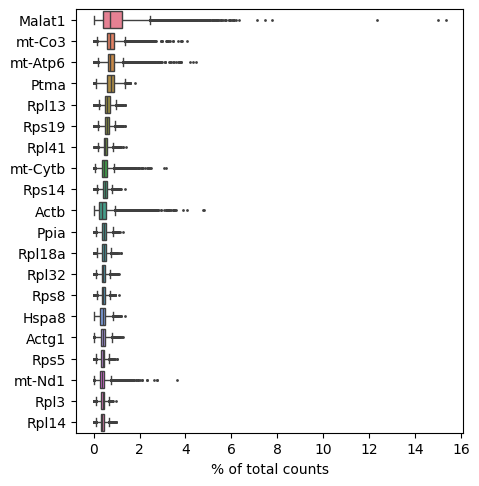

None


In [ ]:
print(sc.pl.highest_expr_genes(t1, n_top=20, ))

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)
# sc.pp.log1p(t1)

In [ ]:
pseudobulk_t1 = t1.X.mean(axis=0)
print(pseudobulk_t1)

[[0.00113179 0.         0.         ... 0.10274448 0.000142   0.00174793]]


In [ ]:
# Generate new information about counts
t1.var_names_make_unique()
sc.pp.calculate_qc_metrics(t1, log1p=False, inplace=True)

frame1_obs = pd.DataFrame(t1.obs)
frame1_obs.drop(['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], axis=1)

frame1_vars = pd.DataFrame(t1.var)

In [ ]:
t1.layers["t1.X"] = t1.X
t1.to_df(layer="t1.X")

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGAACTGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCCACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8082,0.0,0.0,0.0
AAACCTGAGACTAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.686006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGCCGATTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.892864,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTTGCGCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCATCATGCATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.098853,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


# Create Pseudobulk

In [ ]:
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

sc.pp.normalize_total(t0, target_sum=1e4)
sc.pp.normalize_total(t1, target_sum=1e4)
sc.pp.normalize_total(t2, target_sum=1e4)
sc.pp.normalize_total(t3, target_sum=1e4)
sc.pp.normalize_total(t4, target_sum=1e4)
sc.pp.normalize_total(t5, target_sum=1e4)
sc.pp.normalize_total(t6, target_sum=1e4)

h5_files = [t0, t1, t2, t3, t4, t5, t6]
pseudo_bulks = []

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

In [ ]:
t0.var_names
max_value = t0.X.max()
print(max_value)

5743.3667


In [ ]:
def pseudo_bulk(h5_file): # Creates pseudobulk of h5 file
  sc.pp.normalize_total(h5_file, target_sum=1e4)
  pseudobulk_h5_file = h5_file.X.mean(axis=0)

  values = []
  for i in range(pseudobulk_h5_file.shape[1]):
    values.append(pseudobulk_h5_file[0,i])

  return np.array(values)

In [ ]:
def create_pseudo_bulk(h5_files): # Generates pseudobulk from all time-stamps
  pseudo_bulks = []
  for h5_file in h5_files:
    pseudo_h5 = pseudo_bulk(h5_file)
    pseudo_bulks.append(pseudo_h5)

  return np.array(pseudo_bulks)

In [ ]:
obs_names = {} # For .obs of bulk AnnData object
for i in range(len(h5_files)): # 7
  obs_names[i] = "TimeStamp" + str(i)
obs_frame = pd.DataFrame(list(obs_names.items()), columns=['Index', 'TimeStamp'])
print(obs_frame)

   Index   TimeStamp
0      0  TimeStamp0
1      1  TimeStamp1
2      2  TimeStamp2
3      3  TimeStamp3
4      4  TimeStamp4
5      5  TimeStamp5
6      6  TimeStamp6


In [ ]:
bulks = create_pseudo_bulk(h5_files)
bulks_adata = ad.AnnData(bulks, obs=obs_frame, var=t0.var)

In [ ]:
print(bulks_adata.X)
print(bulks_adata.obs)
print(bulks_adata.var)

[[1.1317938e-03 0.0000000e+00 0.0000000e+00 ... 1.0274448e-01
  1.4200195e-04 1.7479266e-03]
 [3.7995083e-04 0.0000000e+00 1.0629904e-04 ... 1.1197486e-01
  1.0389585e-04 3.8963489e-03]
 [2.5405546e-04 0.0000000e+00 0.0000000e+00 ... 1.2159945e-01
  0.0000000e+00 7.9007307e-03]
 ...
 [6.2037073e-04 2.2444893e-04 3.1621216e-04 ... 2.7425325e-01
  0.0000000e+00 1.4634721e-02]
 [0.0000000e+00 0.0000000e+00 9.7656899e-05 ... 1.2613006e-01
  0.0000000e+00 1.4958507e-02]
 [1.0511717e-03 0.0000000e+00 1.1555251e-03 ... 1.4415525e-01
  0.0000000e+00 1.6579513e-02]]
   Index   TimeStamp
0      0  TimeStamp0
1      1  TimeStamp1
2      2  TimeStamp2
3      3  TimeStamp3
4      4  TimeStamp4
5      5  TimeStamp5
6      6  TimeStamp6
                          gene_ids
Xkr4            ENSMUSG00000051951
Gm1992          ENSMUSG00000089699
Gm37381         ENSMUSG00000102343
Rp1             ENSMUSG00000025900
Rp1             ENSMUSG00000109048
...                            ...
AC168977.1      ENSMUSG

In [ ]:
bulks_adata.obs['files'] = ['GSM4504959_E12.5_filtered_gene_bc_matrices.h5', 'GSM4504960_E15.5_filtered_gene_bc_matrices.h5',
                            'GSM4504961_E17.5_filtered_gene_bc_matrices.h5', 'GSM4504962_P3_filtered_gene_bc_matrices.h5',
                            'GSM4504963_P7_filtered_gene_bc_matrices.h5', 'GSM4504964_P15_filtered_gene_bc_matrices.h5',
                            'GSM4504965_P42_filtered_gene_bc_matrices.h5']

In [ ]:
bulks_adata.var['gene_ids']

In [ ]:
bulks_adata.obs['files']

In [ ]:
def pick_gene(gene_no, gene_database=bulks_adata):
  return gene_database.X[:, gene_no]

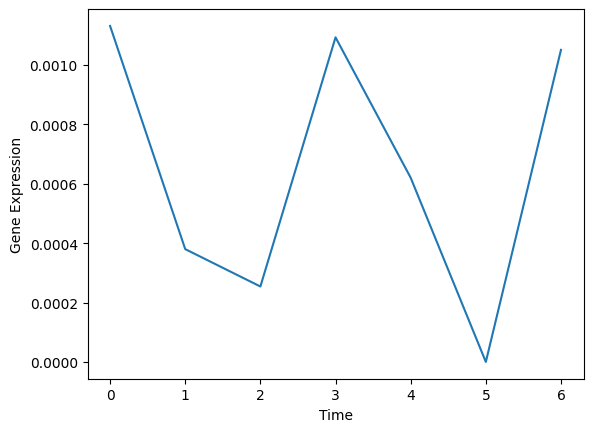

In [ ]:
# Look at time series patterns of a selected gene
gene_timeseries = pick_gene(0)
def plot_geneseries(gene):
  length = [x for x in range(len(gene))]
  plt.plot(length, gene)
  plt.xlabel('Time')
  plt.ylabel('Gene Expression')

plot_geneseries(gene_timeseries)

# Model

### KNN Function
Find neighboring genes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
k = 50
k += 1
neighbors = NearestNeighbors(n_neighbors=k) # k = x, x-1 neighbors
neighbors.fit(bulks_adata.X.T)

def find_neighbors(g, neighbors_func=neighbors, gene_database=bulks_adata):
  neighbor_arr = neighbors_func.kneighbors([g])
  return neighbor_arr[1][0][1:]

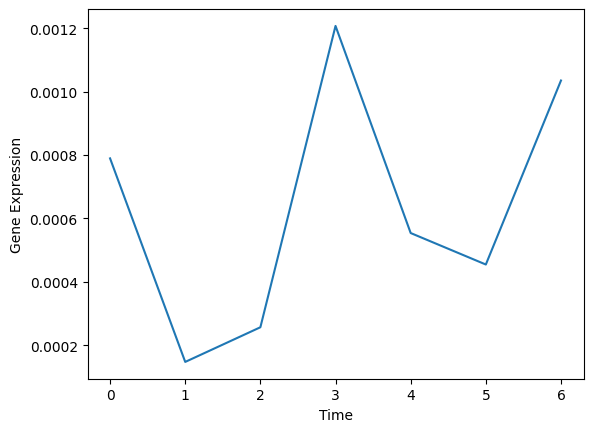

In [ ]:
# Check, do the time series looks similar?
gene_0 = pick_gene(0)
gene0_neighbors = find_neighbors(gene_0)
plot_geneseries(pick_gene(gene0_neighbors[1]))

### Data Preprocessing

In [ ]:
# Format input for NN
def format_input(g, gene_database=bulks_adata): # Shape input to our desired format: [g1,...,gt,n1,...,nt,1,2,...,t]
  """
    format_input formats the input for the NN

    :param g: Gene expression values for single gene g
    :param gene_database: Database to pull gene expressions from

    :return: Formatted input, with genes and neighbors as features
  """
  neighbors = find_neighbors(g, gene_database=gene_database) # Get indices of all neighbors of g
  input = np.array(g)

  for n in neighbors:
    neighbor_gene = np.array(pick_gene(n))
    input = np.concatenate((input, neighbor_gene), axis=None) # Concat neighbors with original gene

  return input

gene0 = format_input(pick_gene(0))
# print(gene0)

In [ ]:
# --------------- Deprecated ---------------


# # Masking mechanism
# def mask(time_points, input, mask_value=0, gene_database=bulks_adata): # Time points start form 0. Time points is of type array
#   """
#     mask is function to mask inputs

#     :param time_points: Array. What time points to mask
#     :param input: Input array to be masked
#     :param gene_database: Database to pull gene expressions from

#     :return: Masked array and masked values separately
#   """
#   new_arr = input.copy()
#   max_timepoints = bulks_adata.obs.shape[0]
#   masked = []

#   first_y = []

#   for n in range(len(input)):
#     ts_mask = n % max_timepoints
#     if ts_mask in time_points: # Mask each time-point for every neighbour
#       masked.append(new_arr[n])

#       if ts_mask == time_points[0]:
#         val = 0
#         first_y.append(new_arr[n])
#       else:
#         val = -1
#       new_arr[n] = val # Masked with zero by default

#   return new_arr, first_y

# test, masked = mask([3, 2, 1], gene0)
# print(test, masked)

In [ ]:
# Masking mechanism
def mask(time_points, input, mask_value=0, gene_database=bulks_adata): # Time points start form 0. Time points is of type array
  """
    mask is function to mask inputs

    :param time_points: Array. What time points to mask
    :param input: Input array to be masked
    :param gene_database: Database to pull gene expressions from

    :return: Masked array and masked values separately. Masked array has masked index appended to end.
  """
  new_arr = input.copy()
  max_timepoints = bulks_adata.obs.shape[0]
  masked = []

  first_y = []

  for n in range(len(input)):
    ts_mask = n % max_timepoints

    if ts_mask in time_points: # Mask each time-point for every neighbour
      masked.append(new_arr[n])

      if ts_mask == time_points[0]:
        first_y.append(new_arr[n])

      new_arr[n] = mask_value  # Masked with zero by default

  new_arr = np.append(new_arr, time_points[0])

  return new_arr, first_y

test, masked = mask([2, 1, 3], gene0)
# print(gene0)
# print(test, masked)

In [ ]:
all_inputs = [] # All inputs, formatted, not scaled
time_embeddings = [x for x in range(bulks_adata.obs.shape[0])] # Time embeddings for each gene

for i in range( int(len(bulks_adata.var)) ):
  # Pick gene and format the input
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)

  all_inputs.append(formatted_input)

In [ ]:
# print(all_inputs[0])

In [ ]:
# X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=False) # 80/20 Split all inputs
X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=True) # 80/20 Split all inputs

In [ ]:
# print(X_train_note[200])

In [ ]:
scaler = StandardScaler() # Standard scaler for inputs
X_train_note = scaler.fit_transform(X_train_note)
X_test_note = scaler.transform(X_test_note)

In [ ]:
all_data = [] # After scaling, append time embeddings
time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]
for i in range(len(X_train_note)):
  all_data.append( np.append(X_train_note[i], time_embeddings) )

for i in range( len(X_test_note) ):
  all_data.append( np.append(X_test_note[i], time_embeddings) )

In [ ]:
X_train = []
X_test = []

for i in range(int(len(all_data) * 0.8)): # 80%, 20% split
  X_train.append( all_data[i] )

for i in range(int(len(all_data) * 0.8)+1, len(all_data)):
  X_test.append( all_data[i] )

In [ ]:
# print(X_train[0])

In [ ]:
def generate_combintations(n, time_points=time_embeddings):
  """
    generate_combintations generates combinations for masking of time points of length n.
    First element is masked and to be predicted, rest are masked.
    Function generates special kind of permutation where only order of first element matters.

    :param time_points: Max number of time points
    :param n: Length of combination (number of time points to mask)

    :return: List of combinations
  """
  combinations = []
  to_skip = int(math.factorial(n-1))-1 # Want only permutations where first number is different, skip the rest
  skipped = to_skip

  # time_array = [x for x in range(time_points)]

  for comb in itertools.combinations(time_points, n): # Generate combinations of length n
    to_avg = [] # Group together permutations that will be averaged in the end

    for permutation in list(itertools.permutations(comb)): # Generate permutations of those combinations
      if skipped > 0: # Dont want all permutations
        skipped -= 1
        continue

      to_avg.append(list(permutation))


      skipped = to_skip

    combinations.append(to_avg)

    # e.g. combinations[0] has lists of size n. Caluclate MAE for predictions of all of them, take average.

  return combinations
# generate_combintations(3)

In [ ]:
def gen_loader(X_train, n):
  X_train_loader = []
  i = 0
  while i < len(X_train)-1:

    for comb in generate_combintations(n):
      loader = []
      for seq in comb:

        if i > len(X_train)-1:
          break

        masked, y = mask(seq, X_train[i])
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)
        arr = [masked, y]

        loader.append(arr)

      X_train_loader.append(loader)
      i += 1

  return X_train_loader

In [ ]:
X_train_loader = []

random.shuffle(X_train)
X_train_loader1 = gen_loader(X_train, 1)

random.shuffle(X_train)
X_train_loader2 = gen_loader(X_train, 2)

random.shuffle(X_train)
X_train_loader3 = gen_loader(X_train, 3)

random.shuffle(X_train)
X_train_loader4 = gen_loader(X_train, 4)

random.shuffle(X_train)
X_train_loader5 = gen_loader(X_train, 5)

random.shuffle(X_train)
X_train_loader6 = gen_loader(X_train, 6)

X_train_loader.extend(X_train_loader6)
X_train_loader.extend(X_train_loader5)
X_train_loader.extend(X_train_loader4)
X_train_loader.extend(X_train_loader3)
X_train_loader.extend(X_train_loader2)
X_train_loader.extend(X_train_loader1)

random.shuffle(X_train_loader)

In [ ]:
print(X_train_loader[301])

[[tensor([-0.1589, -0.1165, -0.1258, -0.0979, -0.1314,  0.0000, -0.0900, -0.1658,
        -0.1273, -0.1336, -0.1311, -0.1321,  0.0000, -0.1755, -0.1691, -0.1447,
        -0.1457, -0.1700, -0.1882,  0.0000, -0.2007, -0.1694, -0.1469, -0.1480,
        -0.1643, -0.1833,  0.0000, -0.1983, -0.1636, -0.1468, -0.1483, -0.1672,
        -0.1882,  0.0000, -0.2051, -0.1687, -0.1478, -0.1507, -0.1711, -0.1927,
         0.0000, -0.2024, -0.1740, -0.1503, -0.1506, -0.1712, -0.1929,  0.0000,
        -0.2091, -0.1667, -0.1481, -0.1508, -0.1742, -0.1968,  0.0000, -0.2085,
        -0.1663, -0.1514, -0.1514, -0.1696, -0.1922,  0.0000, -0.2084, -0.1713,
        -0.1510, -0.1535, -0.1710, -0.1980,  0.0000, -0.2257, -0.1730, -0.1512,
        -0.1531, -0.1768, -0.2008,  0.0000, -0.2234, -0.1812, -0.1528, -0.1534,
        -0.1760, -0.2036,  0.0000, -0.2244, -0.1809, -0.1529, -0.1484, -0.1733,
        -0.1969,  0.0000, -0.1998, -0.1775, -0.1537, -0.1505, -0.1733, -0.1954,
         0.0000, -0.2185, -0.1745, -0.

In [ ]:
# X_test_loader = []

# X_test_loader1 = gen_loader(X_test, 1)[0]
# X_test_loader1 = gen_loader(X_test, 2)[0]
# X_test_loader1 = gen_loader(X_test, 3)[0]
# X_test_loader1 = gen_loader(X_test, 4)[0]
# X_test_loader1 = gen_loader(X_test, 5)[0]
# X_test_loader1 = gen_loader(X_test, 6)[0]

In [ ]:
# ----------- Deprecated -----------

# Adapted form https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel, https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/
# class GeneDataset(torch.utils.data.Dataset):
#   # Characterizes a dataset for PyTorch
#   def __init__(self, X):
#         # self.genes = genes
#         self.X = X
#         # self.X = X.detach().clone()
#         # self.y = y.detach().clone()

#   def __len__(self):
#         return len(self.X)

#   def __getitem__(self, index):
#         # Generates one sample of data
#         gene = self.X[index]

#         return gene

In [ ]:
# geneTrainSet = GeneDataset(X_train_loader)
# train_loader = DataLoader(geneTrainSet, shuffle=True, batch_size=8)

In [ ]:
# geneTrainSet = GeneDataset(X_train, y_train)
# train_loader = DataLoader(geneTrainSet, shuffle=True, batch_size=8)

In [ ]:
# geneTestSet = GeneDataset(X_test, y_test)
# test_loader = DataLoader(geneTestSet, shuffle=False, batch_size=8)

In [ ]:
# def gen_special_perm(input): # Given a list with unique elements, generate perms. with different first value
#   special_permutations = []

#   for i in list(itertools.permutations(input)):
#     if len(special_permutations) == 0:
#       special_permutations.append(list(i))

#     else:
#       if special_permutations[-1][0] != i[0]:
#         special_permutations.append(list(i))

#   return special_permutations

In [ ]:
# ----------- Deprecated -----------


# Mask arbitrary time-point
# Train X, Y
# X_train = []
# Y_train = []
# for i in range(int(len(bulks_adata.var) * 0.8)): # 80%, 20% split
#   gene_i = pick_gene(i)
#   formatted_input = format_input(gene_i) # Pick gene and format the input
#   masked, value_masked = mask([randrange(len(gene_i))], formatted_input) # Mask arbitrary time-point
#   X_train.append(masked)
#   Y_train.append(value_masked[0])

# # Test X, Y
# X_test = []
# Y_test = []
# for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
#   gene_i = pick_gene(i)
#   formatted_input = format_input(gene_i)
#   masked, value_masked = mask([randrange(len(gene_i))], formatted_input)
#   X_test.append(masked)
#   Y_test.append(value_masked[0])

In [ ]:
# X_validation = []
# Y_validation = []
# for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
#   gene_i = pick_gene(i)
#   formatted_input = format_input(gene_i)
#   masked, y = mask([randrange(len(gene_i))], formatted_input)
#   X_test.append(masked)
#   Y_test.append(y[0])

In [ ]:
# Mask all time-points
# Train X, Y
# X_train_t = []
# Y_train_t = []
# for i in range(int(len(bulks_adata.var) * 0.8)): # 80%, 20% split
#   gene_i = pick_gene(i)
#   formatted_input = format_input(gene_i) # Pick gene and format the input

#   for j in range(len(gene_i)): # Mask all time-points
#     masked, y = mask([j], formatted_input)
#     X_train_t.append(masked)
#     Y_train_t.append(y[0])

# # Test X, Y
# X_test_t = []
# Y_test_t = []
# for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
#   gene_i = pick_gene(i)
#   formatted_input = format_input(gene_i)

#   for j in range(len(gene_i)):
#     masked, y = mask([j], formatted_input)
#     X_test_t.append(masked)
#     Y_test_t.append(y[0])

In [ ]:
# X_train_t = torch.tensor(np.array(X_train), dtype=torch.float32)
# Y_train_t = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1)

# X_test_t = torch.tensor(np.array(X_test), dtype=torch.float32)
# Y_test_t = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

In [ ]:
# X_train = torch.tensor(np.array(X_train_t), dtype=torch.float32)
# Y_train = torch.tensor(Y_train_t, dtype=torch.float32).reshape(-1, 1)

# X_test = torch.tensor(np.array(X_test_t), dtype=torch.float32)
# Y_test = torch.tensor(Y_test_t, dtype=torch.float32).reshape(-1, 1)

### Regression DNN
[PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, output_size),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork((k+1) * 7 + 1, 1) # 7
model.load_state_dict(torch.load("/content/model_allTS_shuffled_v2.pth"))

In [ ]:
# model = NeuralNetwork((k+1) * 7 + 1, 1)
model = NeuralNetwork(28+7+1, 1)

# loss_fn = nn.MSELoss()
loss_fn = torch.nn.L1Loss(reduction='none')
# optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.00001)

optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
def train_model_combination(model, loader, optimizer, loss_fn, epochs):
  model.train()
  epoch_vals = []
  loss_vals = []

  for epoch in range(epochs):
    last_loss = 0

    for batch in loader:
      if batch == []:
        continue

      avg_loss = 0
      optimizer.zero_grad()

      for x, y in batch:
        y_pred = model(x)

        loss = loss_fn(y_pred, y)
        avg_loss += loss/len(batch)

      avg_loss.backward()

      optimizer.step()
      last_loss = avg_loss.item()

    scheduler.step()
    loss_vals.append(last_loss)

    print(f'Epoch {epoch}: Loss = {last_loss}')

train_model_combination(model, X_train_loader, optimizer, loss_fn, epochs=2)

In [ ]:
# model.eval()

# y_pred = model(torch.tensor(X_test, dtype=torch.float32))
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# loss = loss_fn(y_pred, y_test_tensor)

# print(f'Test Loss: {loss.item()}')

Test Loss: 1.9171658754348755


In [ ]:
torch.save(model.state_dict(), "model_allTS_20n_64x32.pth")

In [ ]:
# # RMSE
# rmse = torch.sqrt(loss)
# print(f'Root Mean Squared Error: {rmse.item()}')

# # MAE
# mae = torch.mean(torch.abs(y_pred - y_test_tensor))
# print(f'Mean Absolute Error: {mae.item()}')

#### Measuring Performance
For each gene, measure avg accuracy, correlation, MAE, MSE

In [ ]:
def MAE(pred, y):
  return abs(pred-y)

def MSE(pred, y):
  return (pred-y)**2

def RMSE(pred, y):
  return torch.sqrt(MSE(pred, y))

In [ ]:
# Given a gene, for each masked time point, measure metric on predicted value
def metric_for_timepoints(gene_no, metric_func, model=model, database=all_data, plot=False, printB=False):
  """
    metric_for_timepoints calculate performance metric for prediction of each hidden time point for single gene gene_no

    :param gene_no: Gene to pick
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Value of metric for each hidden time point for gene_no, also prints lowest value
  """
  # gene = pick_gene(gene_no)
  # formatted_input = format_input(gene)
  model.eval()
  gene = database[gene_no]
  max_TS = int(gene[-1])+1

  metric_values = []

  with torch.no_grad():
    for i in range(max_TS):
      masked, y = mask([i], gene)
      masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

      prediction = model(masked) # Get predicted value for time point i
      metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
      metric_values.append(metric_measure) # Append value of error

      if printB: print(f'{metric_func.__name__} for time point {i}: {metric_measure}') # Print error value for each time point

  metric_values = np.array(metric_values)
  metric_values_minmax = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points
    print(f'Lowest time point: {metric_values.argmin()}')

  if plot:
    length = [x for x in range(len(gene))]
    metric_values = [x.item() for x in metric_values]
    plt.plot(length, metric_values)
    plt.xlabel('Time')
    plt.ylabel('Measurement')

  return metric_values # Error values with metric_func for all time points for gene_no

In [ ]:
print(all_data[0])

In [ ]:
print(all_encoded[0])

In [ ]:
vals = metric_for_timepoints(24002, MAE, model, database=all_encoded, printB=True)

MAE for time point 0: 0.26570117473602295
MAE for time point 1: 0.018680348992347717
MAE for time point 2: 0.16353583335876465
MAE for time point 3: 0.0855478048324585
MAE for time point 4: 0.04981893301010132
MAE for time point 5: 0.0020519495010375977
MAE for time point 6: 0.0884215235710144
Average MAE: 0.09625108114310674
Lowest time point: 5


In [ ]:
# Average metric of specific time point, for genes form 0 to test_timepoints. Prints avg for all genes at specified time point
def avg_metric(metric_func, time_points=len(bulks_adata.obs), number_genes=len(bulks_adata.var), printB=False):
  """
    avg_metric calculate performance metric for prediction of each hidden time point for every gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """
  avg_val = np.zeros(time_points)

  for i in range(number_genes):
    vals = metric_for_timepoints(i, metric_func, model)
    avg_val += vals

  avg_val = avg_val/number_genes
  avg_val_minmax = (avg_val - avg_val.min()) / (avg_val.max() - avg_val.min())

  avg_allTS = 0

  for t in range(time_points):
    avg_allTS += avg_val[t]/time_points
    if printB: print(f'Average {metric_func.__name__} value for all genes at time point {t}: {avg_val[t]}')

  print()

  for t in range(time_points):
    if printB: print(f'Average minmax {metric_func.__name__} value for all genes at time point {t}: {avg_val_minmax[t]}')

  print()
  print(f'Average {metric_func.__name__} value for all genes: {avg_allTS}')
  print(f'Average minamx {metric_func.__name__} value for all genes: {avg_val_minmax.sum()/time_points}')
  print(f'Lowest time point: {avg_val_minmax.argmin()}')

  return avg_val

In [ ]:
tavg_MAE = avg_metric(MAE, printB=True)

Average MAE value for all genes at time point 0: 0.098220014031036
Average MAE value for all genes at time point 1: 0.057974925566428005
Average MAE value for all genes at time point 2: 0.044063362599690487
Average MAE value for all genes at time point 3: 0.03788174442681116
Average MAE value for all genes at time point 4: 0.03261682409892104
Average MAE value for all genes at time point 5: 0.05536126851653836
Average MAE value for all genes at time point 6: 0.06627601941178793

Average minmax MAE value for all genes at time point 0: 1.0
Average minmax MAE value for all genes at time point 1: 0.3865376286388983
Average minmax MAE value for all genes at time point 2: 0.17448143165925506
Average minmax MAE value for all genes at time point 3: 0.08025402931379046
Average minmax MAE value for all genes at time point 4: 0.0
Average minmax MAE value for all genes at time point 5: 0.34669723288079246
Average minmax MAE value for all genes at time point 6: 0.5130725403398346

Average MAE value

In [ ]:
tavg_MAE = avg_metric(MAE, printB=True)

Average MAE value for all genes at time point 0: 0.09868200317217816
Average MAE value for all genes at time point 1: 0.08932543465923455
Average MAE value for all genes at time point 2: 0.056191604314469075
Average MAE value for all genes at time point 3: 0.04658634284098358
Average MAE value for all genes at time point 4: 0.06039584624926052
Average MAE value for all genes at time point 5: 0.0696988520078418
Average MAE value for all genes at time point 6: 0.0651001689532858

Average minmax MAE value for all genes at time point 0: 1.0
Average minmax MAE value for all genes at time point 1: 0.8203963928384846
Average minmax MAE value for all genes at time point 2: 0.18437738215468824
Average minmax MAE value for all genes at time point 3: 0.0
Average minmax MAE value for all genes at time point 4: 0.26507972680419
Average minmax MAE value for all genes at time point 5: 0.44365517242553476
Average minmax MAE value for all genes at time point 6: 0.35538135028142154

Average MAE value fo

In [ ]:
# Calculate correlation for predicted and truth value for all genes, at a specific time point
def correlation_timepoint(time_point, database=all_data, model=model, printB=False, plot=False):
  if time_point >= len(bulks_adata.obs):
    print(f'Time point {time_point} out of range')
    return None

  model.eval()

  y_truth = np.zeros(len(bulks_adata.var))
  y_pred = np.zeros(len(bulks_adata.var))

  with torch.no_grad():
    for i in range(len(bulks_adata.var)):
      # gene_i = pick_gene(i)
      # formatted_input = format_input(gene_i)
      formatted_input = database[i]
      # print(formatted_input)

      masked, y = mask([time_point], formatted_input)
      # print(len(masked))
      masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

      # print(masked)

      prediction = model(masked) # Get predicted value for masked time_point

      y_truth[i] = y.item()
      y_pred[i] = prediction.item()

  SSR = np.square((y_truth-y_pred)).sum()
  SST = np.square((y_truth-y_truth.mean())).sum()
  R_square = 1 - SSR/SST

  r = scipy.stats.pearsonr(y_truth, y_pred)
  r_square = r[0]**2

  if printB:
    print(f'Pearson Correlation Coefficient (R) for time point {time_point}: {r[0]}')
    print(f'Coefficient of Determination (R^2) for {time_point}: {r_square}\n')
    # print(f'R^2 manual {R_square}')

  if plot:
    plt.title(f"Scatter plot of true and predicted values for all genes at time {time_point}")
    plt.scatter(y_truth, y_pred)
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()
  return r[0]

In [ ]:
# Calculate average correlation for predicted and truth value for all genes, for all time points
def correlation_avg(printB=False):
  avg_r = 0
  avg_r_square = 0

  r_values = []
  for i in range(len(bulks_adata.obs)):
    r_i = correlation_timepoint(i)
    r_values.append(r_i)

    avg_r += r_i
    avg_r_square += r_i**2

  avg_r = avg_r/len(bulks_adata.obs)
  avg_r_square = avg_r_square/len(bulks_adata.obs)

  r_values = np.array(r_values)

  r_values_minmax = (r_values - r_values.min()) / (r_values.max() - r_values.min())

  if printB:
    for i in range(len(bulks_adata.obs)):
      print(f'Pearson Correlation Coefficient (R) for time point {i}: {r_values[i]}')
      print(f'Coefficient of Determination (R^2) for  {i}: {r_values[i] ** 2}\n')

    print(f'Average Pearson Correlation Coefficient (R): {avg_r}')
    print(f'Average Coefficient of Determination (R^2): {avg_r_square}')

    print(r_values_minmax)

  return avg_r, avg_r_square

In [ ]:
avg_r, avg_r_square = correlation_avg(printB=True)

Pearson Correlation Coefficient (R) for time point 0: 0.8281437940164995
Coefficient of Determination (R^2) for  0: 0.6858221435680424

Pearson Correlation Coefficient (R) for time point 1: 0.7861689890516892
Coefficient of Determination (R^2) for  1: 0.618061679346555

Pearson Correlation Coefficient (R) for time point 2: 0.8924766682123166
Coefficient of Determination (R^2) for  2: 0.7965146033033575

Pearson Correlation Coefficient (R) for time point 3: 0.7783229601623523
Coefficient of Determination (R^2) for  3: 0.6057866303158865

Pearson Correlation Coefficient (R) for time point 4: 0.6927633031466368
Coefficient of Determination (R^2) for  4: 0.479920994186639

Pearson Correlation Coefficient (R) for time point 5: 0.4925445862903133
Coefficient of Determination (R^2) for  5: 0.24260016948389587

Pearson Correlation Coefficient (R) for time point 6: 0.5333346372818486
Coefficient of Determination (R^2) for  6: 0.284445835324561

Average Pearson Correlation Coefficient (R): 0.714

###### Metrics for combinations of masked time points

In [ ]:
def metric_combinationTS(gene_no, metric_func, n, database=all_data, model=model, time_points=time_embeddings, printB=False):
  """
    metric_combinationTS calculate performance metric for prediction of combinations hidden time points for single gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """

  model.eval()
  gene = database[gene_no]
  max_TS = int(gene[-1])+1

  combinations = generate_combintations(n)

  metric_values = []
  # all_avg_vals = []

  with torch.no_grad():
    for comb in combinations: # Sequence of combinations to average
      combintation_sum = 0 # Sum absolute error of all combinations, then divide by n

      for sequence in comb: # Calculate MAE for each sequence, average them
        # print(sequence)
        masked, y = mask(sequence, gene)
        # print(masked)
        # print(y)

        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

        prediction = model(masked) # Get predicted value for time points
        # print(prediction)
        metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
        combintation_sum += metric_measure

      avg_combination = combintation_sum/n
      metric_values.append(avg_combination) # Append value of error

      if printB: print(f'{metric_func.__name__} for time point(s) {comb[0]}: {avg_combination}') # Print error value for each time point(s)

  metric_values = np.array(metric_values)
  metric_values_minmax = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points
    print(f'Lowest time point(s): {combinations[metric_values.argmin()][0] }')

  return metric_values

In [ ]:
ar_24002 = metric_combinationTS(24002, MAE, 2, printB=True)

In [ ]:
def avg_metric_combinationTS(metric_func, n, model, time_points=len(bulks_adata.obs), database=all_data, number_genes=len(bulks_adata.var), printB=False):
  """
    avg_metric_combinationTS calculate average performance metric for prediction of combinations hidden time points for every gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """
  TS_combinations = generate_combintations(n)
  avg_val = np.zeros(len(TS_combinations))

  for i in range(number_genes):
    vals = metric_combinationTS(i, metric_func, n, model=model, database=database)
    avg_val += vals

  avg_val = avg_val/number_genes
  avg_val_minmax = (avg_val - avg_val.min()) / (avg_val.max() - avg_val.min())
  avg_allTS = 0

  for t in range(len(avg_val)):
    avg_allTS += avg_val[t]
    if printB: print(f'Average {metric_func.__name__} value for all genes at time point {TS_combinations[t][0]}: {avg_val[t]}')

  avg_allTS = avg_allTS/len(avg_val)

  print()
  print(f'Average {metric_func.__name__} value for all genes: {avg_allTS}')
  print(f'Lowest time point: {TS_combinations[avg_val.argmin()][0]}')

  return avg_val, avg_allTS

In [ ]:
avg_valarray_1, avg_val_1 = avg_metric_combinationTS(MAE, 1, model, printB=True, database=all_encoded)

Average MAE value for all genes at time point [0]: 0.08932990827362502
Average MAE value for all genes at time point [1]: 0.13376618968392728
Average MAE value for all genes at time point [2]: 0.3909483080504579
Average MAE value for all genes at time point [3]: 0.16348431496723279
Average MAE value for all genes at time point [4]: 0.09845796887577166
Average MAE value for all genes at time point [5]: 0.07845832448322583
Average MAE value for all genes at time point [6]: 0.08154058406924221

Average MAE value for all genes: 0.14799794262906896
Lowest time point: [5]


In [ ]:
avg_valarray_2, avg_val_2 = avg_metric_combinationTS(MAE, 2, model, printB=True, database=all_encoded)

Average MAE value for all genes at time point [0, 1]: 0.2209914473258451
Average MAE value for all genes at time point [0, 2]: 0.2448183554815104
Average MAE value for all genes at time point [0, 3]: 0.22008083296352757
Average MAE value for all genes at time point [0, 4]: 0.10408187417181532
Average MAE value for all genes at time point [0, 5]: 0.0783923371481328
Average MAE value for all genes at time point [0, 6]: 0.1259201487385059
Average MAE value for all genes at time point [1, 2]: 0.40189712157575286
Average MAE value for all genes at time point [1, 3]: 0.35298802093169124
Average MAE value for all genes at time point [1, 4]: 0.07346787034345045
Average MAE value for all genes at time point [1, 5]: 0.10260413829480715
Average MAE value for all genes at time point [1, 6]: 0.09258125249395686
Average MAE value for all genes at time point [2, 3]: 0.4942744525239743
Average MAE value for all genes at time point [2, 4]: 0.3476040397868299
Average MAE value for all genes at time poin

In [ ]:
avg_valarray_3, avg_val_3 = avg_metric_combinationTS(MAE, 3, model, printB=True, database=all_encoded)

Average MAE value for all genes at time point [0, 2, 1]: 0.35027878836813714
Average MAE value for all genes at time point [0, 3, 1]: 0.29051755850383637
Average MAE value for all genes at time point [0, 4, 1]: 0.1601521066396519
Average MAE value for all genes at time point [0, 5, 1]: 0.1689309114655577
Average MAE value for all genes at time point [0, 6, 1]: 0.17080566820953003
Average MAE value for all genes at time point [0, 3, 2]: 0.3716854550356875
Average MAE value for all genes at time point [0, 4, 2]: 0.2497781720016591
Average MAE value for all genes at time point [0, 5, 2]: 0.20818642305542334
Average MAE value for all genes at time point [0, 6, 2]: 0.23054899240622348
Average MAE value for all genes at time point [0, 4, 3]: 0.35792133613520744
Average MAE value for all genes at time point [0, 5, 3]: 0.28634590390667064
Average MAE value for all genes at time point [0, 6, 3]: 0.25579196066835963
Average MAE value for all genes at time point [0, 5, 4]: 0.145596344099474
Avera

In [ ]:
avg_valarray_4, avg_val_4 = avg_metric_combinationTS(MAE, 4, model, printB=True, database=all_encoded)

Average MAE value for all genes at time point [0, 3, 2, 1]: 0.36694005717759837
Average MAE value for all genes at time point [0, 4, 2, 1]: 0.3065313284984208
Average MAE value for all genes at time point [0, 5, 2, 1]: 0.2705262405379961
Average MAE value for all genes at time point [0, 6, 2, 1]: 0.29001876553032746
Average MAE value for all genes at time point [0, 4, 3, 1]: 0.3246988283671403
Average MAE value for all genes at time point [0, 5, 3, 1]: 0.28513759107397174
Average MAE value for all genes at time point [0, 6, 3, 1]: 0.2885379513416459
Average MAE value for all genes at time point [0, 5, 4, 1]: 0.18053532624265453
Average MAE value for all genes at time point [0, 6, 4, 1]: 0.1393994223020001
Average MAE value for all genes at time point [0, 6, 5, 1]: 0.16454897009491767
Average MAE value for all genes at time point [0, 4, 3, 2]: 0.41893684646542795
Average MAE value for all genes at time point [0, 5, 3, 2]: 0.3592497602261722
Average MAE value for all genes at time point 

In [ ]:
avg_valarray_5, avg_val_5 = avg_metric_combinationTS(MAE, 5, model, printB=True, database=all_encoded)

Average MAE value for all genes at time point [0, 4, 3, 2, 1]: 0.372648636941801
Average MAE value for all genes at time point [0, 5, 3, 2, 1]: 0.3237547280667882
Average MAE value for all genes at time point [0, 6, 3, 2, 1]: 0.3448676784409165
Average MAE value for all genes at time point [0, 5, 4, 2, 1]: 0.27878310332820216
Average MAE value for all genes at time point [0, 6, 4, 2, 1]: 0.2837492422373439
Average MAE value for all genes at time point [0, 6, 5, 2, 1]: 0.250519479036948
Average MAE value for all genes at time point [0, 5, 4, 3, 1]: 0.279743363122509
Average MAE value for all genes at time point [0, 6, 4, 3, 1]: 0.27967404354865444
Average MAE value for all genes at time point [0, 6, 5, 3, 1]: 0.25867116068512813
Average MAE value for all genes at time point [0, 6, 5, 4, 1]: 0.18368759411743338
Average MAE value for all genes at time point [0, 5, 4, 3, 2]: 0.35711452636156416
Average MAE value for all genes at time point [0, 6, 4, 3, 2]: 0.3519738641556019
Average MAE va

In [ ]:
avg_valarray_6, avg_val_6 = avg_metric_combinationTS(MAE, 6, model, printB=True, database=all_encoded)

Average MAE value for all genes at time point [0, 5, 4, 3, 2, 1]: 0.36292094623113147
Average MAE value for all genes at time point [0, 6, 4, 3, 2, 1]: 0.3853687363030421
Average MAE value for all genes at time point [0, 6, 5, 3, 2, 1]: 0.34889646728110774
Average MAE value for all genes at time point [0, 6, 5, 4, 2, 1]: 0.30534432949769597
Average MAE value for all genes at time point [0, 6, 5, 4, 3, 1]: 0.2898528958662314
Average MAE value for all genes at time point [0, 6, 5, 4, 3, 2]: 0.37528114228746257
Average MAE value for all genes at time point [1, 6, 5, 4, 3, 2]: 0.4511335880977788

Average MAE value for all genes: 0.3598283007949215
Lowest time point: [0, 6, 5, 4, 3, 1]


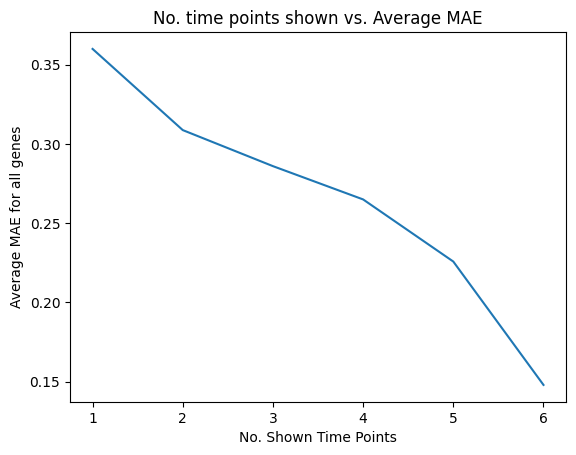

In [ ]:
plt.title(f"No. time points shown vs. Average MAE")
plt.plot([1, 2, 3, 4, 5, 6], [avg_val_6, avg_val_5, avg_val_4, avg_val_3, avg_val_2, avg_val_1])
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average MAE for all genes')
plt.show()

In [ ]:
# Calculate correlation for predicted and truth value for all genes, at a specific time point
def correlation_combination_timepoint(n, database=all_data, model=model, printB=False):
  model.eval()

  # y_truth = np.zeros(len(bulks_adata.var))
  # y_pred = np.zeros(len(bulks_adata.var))

  combinations = generate_combintations(n)

  r_values = []
  r2_values = []

  with torch.no_grad():
    for comb in combinations:
      r_vals = 0
      r2_vals = 0

      for sequence in comb:
        y_true_seq = np.zeros(len(bulks_adata.var))
        y_pred_seq = np.zeros(len(bulks_adata.var))

        for i in range(len(bulks_adata.var)):
          formatted_input = database[i]

          masked, y = mask(sequence, formatted_input)
          masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

          # print(masked)

          prediction = model(masked) # Get predicted value for masked time_point

          y_true_seq[i] = y.item()
          y_pred_seq[i] = prediction.item()

        r = scipy.stats.pearsonr(y_true_seq, y_pred_seq)[0]
        r_vals += r
        r2_vals += r**2

      r_values.append(r_vals/len(comb))
      r2_values.append(r2_vals/len(comb))


      if printB:
        print(f'R for time point(s) {comb[0]}: {r}')
        print(f'R^2 for time point(s) {comb[0]}: {r**2}')
        print()

  r_values = np.array(r_values)
  r2_values = np.array(r2_values)

  avg_r2 = r2_values.sum()/len(r2_values)

  if printB: print(f'Average R^2: {avg_r2}')

  # SSR = np.square((y_truth-y_pred)).sum()
  # SST = np.square((y_truth-y_truth.mean())).sum()
  # R_square = 1 - SSR/SST

  # r = scipy.stats.pearsonr(y_truth, y_pred)
  # r_square = r[0]**2

  # if printB:
  #   print(f'Pearson Correlation Coefficient (R) for time point {time_point}: {r[0]}')
  #   print(f'Coefficient of Determination (R^2) for {time_point}: {r_square}\n')
  #   # print(f'R^2 manual {R_square}')

  # if plot:
  #   plt.title(f"Scatter plot of true and predicted values for all genes at time {time_point}")
  #   plt.scatter(y_truth, y_pred)
  #   plt.xlabel('True Value')
  #   plt.ylabel('Predicted Value')
  #   plt.show()
  # return r
  r_vals_minmax = (r_values - r_values.min()) / (r_values.max() - r_values.min())

  return r_values, avg_r2

In [ ]:
r_vals_1, avg_1 = correlation_combination_timepoint(1, printB=True)

R for time point(s) [0]: 0.8817761233406048
R^2 for time point(s) [0]: 0.7775291316935856

R for time point(s) [1]: 0.7502844204898302
R^2 for time point(s) [1]: 0.5629267116297604

R for time point(s) [2]: 0.9066757294636473
R^2 for time point(s) [2]: 0.8220608783984369

R for time point(s) [3]: 0.7619435405601478
R^2 for time point(s) [3]: 0.5805579590013336

R for time point(s) [4]: 0.8114829657066838
R^2 for time point(s) [4]: 0.6585046036321149

R for time point(s) [5]: 0.5540561844894389
R^2 for time point(s) [5]: 0.3069782555709952

R for time point(s) [6]: 0.6396257203601975
R^2 for time point(s) [6]: 0.40912106214630156

Average R^2: 0.5882398002960755


In [ ]:
r_vals_2, avg_2 = correlation_combination_timepoint(2, printB=True)

R for time point(s) [0, 1]: 0.7511194625001205
R^2 for time point(s) [0, 1]: 0.56418044694647

R for time point(s) [0, 2]: 0.90965444265324
R^2 for time point(s) [0, 2]: 0.8274712050387767

R for time point(s) [0, 3]: 0.7699925896071763
R^2 for time point(s) [0, 3]: 0.5928885880499655

R for time point(s) [0, 4]: 0.8175649229818118
R^2 for time point(s) [0, 4]: 0.6684124032902559

R for time point(s) [0, 5]: 0.5555918369296449
R^2 for time point(s) [0, 5]: 0.30868228926285707

R for time point(s) [0, 6]: 0.6455823633154695
R^2 for time point(s) [0, 6]: 0.41677658782398685

R for time point(s) [1, 2]: 0.9044597119426216
R^2 for time point(s) [1, 2]: 0.8180473705273301

R for time point(s) [1, 3]: 0.7682191532410718
R^2 for time point(s) [1, 3]: 0.5901606674064294

R for time point(s) [1, 4]: 0.8179952325610857
R^2 for time point(s) [1, 4]: 0.6691162004926647

R for time point(s) [1, 5]: 0.5728524689760206
R^2 for time point(s) [1, 5]: 0.32815995121192265

R for time point(s) [1, 6]: 0.6

In [ ]:
r_vals_3, avg_3 = correlation_combination_timepoint(3, printB=True)

R for time point(s) [0, 2, 1]: 0.905876020302391
R^2 for time point(s) [0, 2, 1]: 0.8206113641588979

R for time point(s) [0, 3, 1]: 0.7782069445884933
R^2 for time point(s) [0, 3, 1]: 0.6056060486057582

R for time point(s) [0, 4, 1]: 0.8260228099425349
R^2 for time point(s) [0, 4, 1]: 0.6823136825453611

R for time point(s) [0, 5, 1]: 0.582944504335343
R^2 for time point(s) [0, 5, 1]: 0.3398242951347787

R for time point(s) [0, 6, 1]: 0.6536606860430099
R^2 for time point(s) [0, 6, 1]: 0.4272722924782183

R for time point(s) [0, 3, 2]: 0.7747075452403347
R^2 for time point(s) [0, 3, 2]: 0.6001717806523053

R for time point(s) [0, 4, 2]: 0.8178308335211608
R^2 for time point(s) [0, 4, 2]: 0.6688472722579166

R for time point(s) [0, 5, 2]: 0.5642918071583345
R^2 for time point(s) [0, 5, 2]: 0.318425243626019

R for time point(s) [0, 6, 2]: 0.6555858872755981
R^2 for time point(s) [0, 6, 2]: 0.4297928555949332

R for time point(s) [0, 4, 3]: 0.8041403702945591
R^2 for time point(s) [0, 

In [ ]:
r_vals_4, avg_4 = correlation_combination_timepoint(4, printB=True)

R for time point(s) [0, 3, 2, 1]: 0.7879180558077428
R^2 for time point(s) [0, 3, 2, 1]: 0.6208148626678532

R for time point(s) [0, 4, 2, 1]: 0.8352657419118976
R^2 for time point(s) [0, 4, 2, 1]: 0.6976688596116327

R for time point(s) [0, 5, 2, 1]: 0.5885490055956301
R^2 for time point(s) [0, 5, 2, 1]: 0.346389931987605

R for time point(s) [0, 6, 2, 1]: 0.6695371658294018
R^2 for time point(s) [0, 6, 2, 1]: 0.4482800164268679

R for time point(s) [0, 4, 3, 1]: 0.8076739842665644
R^2 for time point(s) [0, 4, 3, 1]: 0.6523372648610266

R for time point(s) [0, 5, 3, 1]: 0.5258371452380933
R^2 for time point(s) [0, 5, 3, 1]: 0.27650470331214766

R for time point(s) [0, 6, 3, 1]: 0.6526554869586274
R^2 for time point(s) [0, 6, 3, 1]: 0.42595918465720306

R for time point(s) [0, 5, 4, 1]: 0.5790145864531753
R^2 for time point(s) [0, 5, 4, 1]: 0.33525789132554157

R for time point(s) [0, 6, 4, 1]: 0.6653884945870496
R^2 for time point(s) [0, 6, 4, 1]: 0.44274184872882016

R for time point

In [ ]:
r_vals_5, avg_5 = correlation_combination_timepoint(5, printB=True)

R for time point(s) [0, 4, 3, 2, 1]: 0.8087643647054377
R^2 for time point(s) [0, 4, 3, 2, 1]: 0.6540997976173902

R for time point(s) [0, 5, 3, 2, 1]: 0.5543560208194975
R^2 for time point(s) [0, 5, 3, 2, 1]: 0.3073105978188272

R for time point(s) [0, 6, 3, 2, 1]: 0.6791774434854706
R^2 for time point(s) [0, 6, 3, 2, 1]: 0.4612819997394596

R for time point(s) [0, 5, 4, 2, 1]: 0.6099002787705556
R^2 for time point(s) [0, 5, 4, 2, 1]: 0.3719783500444015

R for time point(s) [0, 6, 4, 2, 1]: 0.6988366514296616
R^2 for time point(s) [0, 6, 4, 2, 1]: 0.48837266538142227

R for time point(s) [0, 6, 5, 2, 1]: 0.6191557736328149
R^2 for time point(s) [0, 6, 5, 2, 1]: 0.38335387202284954

R for time point(s) [0, 5, 4, 3, 1]: 0.5135180388886447
R^2 for time point(s) [0, 5, 4, 3, 1]: 0.2637007762640396

R for time point(s) [0, 6, 4, 3, 1]: 0.6692668446437671
R^2 for time point(s) [0, 6, 4, 3, 1]: 0.4479181093394242

R for time point(s) [0, 6, 5, 3, 1]: 0.532880597774198
R^2 for time point(s) [

In [ ]:
r_vals_6, avg_6 = correlation_combination_timepoint(6, printB=True)

R for time point(s) [0, 5, 4, 3, 2, 1]: 0.5149255087264343
R^2 for time point(s) [0, 5, 4, 3, 2, 1]: 0.2651482795371771

R for time point(s) [0, 6, 4, 3, 2, 1]: 0.7432294777643463
R^2 for time point(s) [0, 6, 4, 3, 2, 1]: 0.552390056617863

R for time point(s) [0, 6, 5, 3, 2, 1]: 0.5683013208456962
R^2 for time point(s) [0, 6, 5, 3, 2, 1]: 0.3229663912749629

R for time point(s) [0, 6, 5, 4, 2, 1]: 0.657865214328251
R^2 for time point(s) [0, 6, 5, 4, 2, 1]: 0.43278664022315555

R for time point(s) [0, 6, 5, 4, 3, 1]: 0.5027992719881406
R^2 for time point(s) [0, 6, 5, 4, 3, 1]: 0.25280710791180416

R for time point(s) [0, 6, 5, 4, 3, 2]: 0.4306948871720013
R^2 for time point(s) [0, 6, 5, 4, 3, 2]: 0.18549808583610292

R for time point(s) [1, 6, 5, 4, 3, 2]: 0.4452322198810291
R^2 for time point(s) [1, 6, 5, 4, 3, 2]: 0.19823172962018906

Average R^2: 0.504539478481971


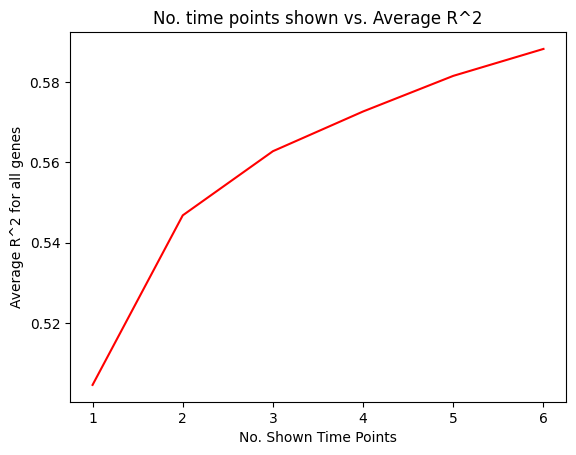

In [ ]:
plt.title(f"No. time points shown vs. Average R^2")
plt.plot([1, 2, 3, 4, 5, 6], [avg_6, avg_5, avg_4, avg_3, avg_2, avg_1], color='red')
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average R^2 for all genes')
plt.show()

### AutoEncoder
[Tutorial](https://www.youtube.com/watch?v=zp8clK9yCro&ab_channel=PatrickLoeber)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            # nn.ReLU(),
            # nn.Linear(32, output_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(output_size, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            # nn.ReLU(),
            # nn.Linear(64, input_size),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

In [ ]:
class GeneDatasetAE(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, X):
        # self.genes = genes
        # self.X = X
        self.X = torch.tensor(X, dtype=torch.float32)
        # self.y = y.detach().clone()

  def __len__(self):
        return len(self.X)

  def __getitem__(self, index):
        # Generates one sample of data
        gene = self.X[index]

        return gene

In [ ]:
geneTrainSet = GeneDatasetAE(X_train_note)
train_loader = DataLoader(geneTrainSet, shuffle=True)

geneTestSet = GeneDatasetAE(X_test_note)
test_loader = DataLoader(geneTestSet, shuffle=True)

In [ ]:
auto_encoder = AutoEncoder(k * 7, 63)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(auto_encoder.parameters(), lr=0.00001, weight_decay=0.00001)

# optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
def train_autoencoder(model, loader, optimizer, loss_fn, epochs):
  model.train()

  epoch_vals = []
  loss_vals = []

  for epoch in range(epochs):
    last_loss = 0

    for batch in loader:
      for X in batch:
        reconstructed, _ = model(X)
        loss = loss_fn(reconstructed, X)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        last_loss = loss.item()

    loss_vals.append(last_loss)

    print(f'Epoch {epoch}: Loss = {last_loss}')

train_autoencoder(auto_encoder, train_loader, optimizer, loss_fn, epochs=2)

Epoch 0: Loss = 0.0037125349044799805
Epoch 1: Loss = 5.136634172231425e-06


In [ ]:
auto_encoder.eval()

X_test_tensor = torch.tensor(X_test_note, dtype=torch.float32)
y_pred, encoded = auto_encoder(torch.tensor(X_test_note, dtype=torch.float32))
encoded2 = auto_encoder.encoder(X_test_tensor)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

loss = loss_fn(y_pred, X_test_tensor)

print(f'Test Loss: {loss.item()}')

Test Loss: 0.0940663143992424


In [ ]:
torch.save(auto_encoder.state_dict(), "auto_encoder"+str(k-1)+"to"+str(63)+".pth")

In [ ]:
print(X_test_tensor[0])
print(y_pred[0])
print(encoded[0])
print(encoded2[0])

In [ ]:
print(X_train[0])
print(X_train_note[0])
print(X_train_loader1[0])

In [ ]:
X_train_note_tensor = torch.tensor(X_train_note, dtype=torch.float32) # X train no TE to tensor
encoded_X_train_loader_note = auto_encoder.encoder(X_train_note_tensor) # Latent space rep. of X train with no TE

encoded_X_train_loader_note = encoded_X_train_loader_note.detach().numpy() # Make into np array

encoded_X_train_loader_withTE = [] # Latent space representation with time embeddings
all_encoded = []

for i in range(len(encoded_X_train_loader_note)):
  encoded_X_train_loader_withTE.append(np.concatenate((encoded_X_train_loader_note[i], time_embeddings)))
  all_encoded.append(np.concatenate((encoded_X_train_loader_note[i], time_embeddings)))

In [ ]:
X_test_note_tensor = torch.tensor(X_test_note, dtype=torch.float32) # X train no TE to tensor
encoded_X_test_loader_note = auto_encoder.encoder(X_test_note_tensor) # Latent space rep. of X train with no TE

encoded_X_test_loader_note = encoded_X_test_loader_note.detach().numpy() # Make into np array

for i in range(len(encoded_X_test_loader_note)):
  all_encoded.append(np.concatenate((encoded_X_test_loader_note[i], time_embeddings)))

In [ ]:
latent_space_X_train_loader = [] # Loader for latent space rep. Use this to train NN

random.shuffle(encoded_X_train_loader_withTE)
X_train_loader1 = gen_loader(encoded_X_train_loader_withTE, 1)

random.shuffle(encoded_X_train_loader_withTE)
X_train_loader2 = gen_loader(encoded_X_train_loader_withTE, 2)

random.shuffle(encoded_X_train_loader_withTE)
X_train_loader3 = gen_loader(encoded_X_train_loader_withTE, 3)

random.shuffle(encoded_X_train_loader_withTE)
X_train_loader4 = gen_loader(encoded_X_train_loader_withTE, 4)

random.shuffle(encoded_X_train_loader_withTE)
X_train_loader5 = gen_loader(encoded_X_train_loader_withTE, 5)

random.shuffle(encoded_X_train_loader_withTE)
X_train_loader6 = gen_loader(encoded_X_train_loader_withTE, 6)

latent_space_X_train_loader.extend(X_train_loader6)
latent_space_X_train_loader.extend(X_train_loader5)
latent_space_X_train_loader.extend(X_train_loader4)
latent_space_X_train_loader.extend(X_train_loader3)
latent_space_X_train_loader.extend(X_train_loader2)
latent_space_X_train_loader.extend(X_train_loader1)

random.shuffle(latent_space_X_train_loader)

In [ ]:
print(len(latent_space_X_train_loader))

134414


In [ ]:
print(latent_space_X_train_loader[1000])

[[tensor([ 0.0000,  0.0912,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.4692,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8001,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.4664,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000]), tensor(0.9485)], [tensor([ 0.0000,  0.0912,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.4692,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8001,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.4664,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  2.0000]), tensor(-0.9377)], [tensor([ 0.0000,  0.0912,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.4692,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8001,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.4664

In [ ]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, output_size):
#         super().__init__()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(input_size, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(32, output_size),
#         )

#     def forward(self, x):
#         logits = self.linear_relu_stack(x)
#         return logits

In [ ]:
model = NeuralNetwork(63+7+1, 1)

# loss_fn = nn.MSELoss()
loss_fn = torch.nn.L1Loss(reduction='none')
# optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.00001)

optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
train_model_combination(model, latent_space_X_train_loader, optimizer, loss_fn, epochs=2)

Epoch 0: Loss = 0.27018919587135315
Epoch 1: Loss = 0.28148114681243896


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [ ]:
torch.save(model.state_dict(), "model_allTS_latentspace63_64x32.pth")